### R8 AIML NLP Project 
### Project1 - Multi label classification problem. 

#### TASK1: PROJECT OBJECTIVE: The need is to build a NLP classifier which can use input text parameters to determine the label/s of of the blog.

1. Import and analyse the data set.
2. Perform data pre-processing on the data:
    * Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.
    * Target/label merger and transformation
    * Train and test split
    * Vectorisation, etc.
3. Design, train, tune and test the best text classifier.
4. Display and explain detail the classification report
5. Print the true vs predicted labels for any 5 entries from the dataset.

In [413]:
#Import libraries
import os
%matplotlib inline
import matplotlib.pyplot as plt # Data Visualization
import pandas as pd # Data processing
import seaborn as sns # Data Visualization
import numpy as np # Linear Algebra
import tensorflow as tf #Tensor Flow
from sklearn import preprocessing #preprocessing libraries from sklearn
import re # regular expression
import nltk #Import natural language toolkit to work with human languade


from sklearn.naive_bayes import MultinomialNB #Naive Bayes classifier for our case of multinomial model
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer  #Sklearn text feature extraction and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV #Sklear train test split and grid search for hyper parameter tuning

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [414]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [415]:
os.chdir('/gdrive/MyDrive/Colab Notebooks/Projects/NLP')

In [416]:
ls -ltr

total 781790
-rw------- 1 root root 800419647 Apr  6 19:55 'Dataset - blogtext.csv'
drwx------ 7 root root      4096 Apr  6 21:00  RajeevSiripynb/
-rw------- 1 root root      6520 Apr 11 09:18  GLBot.json
-rw------- 1 root root         0 Apr 11 10:26  Corpus.csv
-rw------- 1 root root    103909 Apr 11 13:59  model.tflearn.meta
-rw------- 1 root root       890 Apr 11 13:59  model.tflearn.index
-rw------- 1 root root     16257 Apr 11 13:59  model.tflearn.data-00000-of-00001
-rw------- 1 root root       175 Apr 11 13:59  checkpoint


#### Step1: Import and analyze the data

In [417]:
BlogDf= pd.read_csv('Dataset - blogtext.csv') #import the data in to data frame

In [418]:
BlogDf.shape # Checking the shape of the data

(681284, 7)

In [419]:
BlogDf.info() # Check for data type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [420]:
pd.set_option('display.max_colwidth', -1)
BlogDf.sample(5) # Checking random 5 rows

,id,gender,age,topic,sign,date,text
51176,3389825,female,36,Non-Profit,Aquarius,"20,May,2004",Ok..I have to admit'I HAVENT REALLY DONE ANY WORK TODAY' I have spent the majority of my time telling friends about blogger or responding to notes on www.blackplanet.com Ok ok..I will do some work b4 I leave at 5pm- I promise..after I check my notes again on BP. I know I know.....
185005,3971148,female,27,Arts,Leo,"26,July,2004","So, I'm running out of pants to wear...I tried on an old pair yesterday that I forgot I even owned, and it took everything I had to button the button fly.&nbsp; Oof-da.&nbsp; The buttons could have been deadly weapons had they burst off and went airborne.&nbsp; Somebody, and I'm not naming names, needs to slow down with the Ben and Jerry's.&nbsp; &nbsp; When I worked at Amoco, I was constantly moving around, doing things, walking everywhere.&nbsp; Now that I work at the hospital, I sit in a chair mostly.&nbsp; The pants I wore working at Amoco no longer fit me after a year and a half at the hospital.&nbsp; Maybe there's something to be said for being a cashier.&nbsp; &nbsp; &nbsp;"
30648,4252371,male,38,Publishing,Libra,"17,August,2004","I just had a lovely memory of a most beautiful town square in India. Rishikesh to be precise. The town is most famous in the West for the visits The Beatles made to it in the sixties, but even in India it is well known. The town sits in the foothills of the Himalaya, straddling the newly born River Ganges. 25kms or so down river is Haridwar, one of the sites of the quadrennial religious gathering known as the urlLink Kumbha Mela ; the largest gathering of humanity on the planet. As both Haridwar and Rishikesh are holy towns, meat is forbidden. They are strictly vegetarian towns. Rishikesh itself is split into two parts, the main town, which is a very hectic, typically Indian town, full of blaring horns and holy cows. But on the far side of the river there is a part of the town where cars cannot come, populated by ashrams and the occasional guest house. To get there, one must take a boat or cross urlLink a lovely footbridge (which was built by the British during WWII). On the peak of the hill on that quiet side of town, there is a very serene, and seemingly very ancient, town square, which I stumbled across late one afternoon in 1993. The afternoon light was lovely, and there were many sahdus (Indian holy men) sitting around. One sahdu was standing, but leaning on a swing hanging from a large tree. 'He's been standing for nearly 10 years', one of the sahdus later told me proudly. 'He sleeps standing, he eats standing, he even shits standing'. Wow, I thought. Impressive. I smoked a chillum with a few of the sahdus as the light went from yellow to gold and the afternoon shone in its final glory. Whether it was the surroundings, the light, or just the hash, I will never be sure (most likely it was a combination of all three), but I felt a connection to the human social condition that afternoon that I have never felt since. The symbolism of the town square was intensely powerful - particularly without the modern irritations of traffic, noise or advertising. People came and went about their business, as they purchased vegetables for the evening meal, or just sat and talked to their neighbours at the end of the day. I was very envious of the standing sahdu. It was certainly a nice place to hang around (groan..) for a decade. Not that I envied him his feat of religious asceticism. Just the view."
572235,3745396,male,17,Sports-Recreation,Libra,"06,July,2004","Back by popular demand is the third and final installment of Wisconsin Dells saga. It seems that one of my readers was not satisfied with the way I trailed off about the girls I met in the Dells. While I had more important things to do then meet with girls, I did spend a hefty amount of time with them. The three girl's phone numbers I had previously announced I had are still in safe-keeping. I plan on calling 0 out of 3 of these 

In [421]:
# Checking if duplicate rows exist in the database
duplicate = BlogDf[BlogDf.duplicated()]
duplicate.sort_values('id', axis = 0, inplace=True)
duplicate.head(10)

,id,gender,age,topic,sign,date,text
173828,8173,male,42,indUnk,Capricorn,"02,August,2004",urlLink
173545,8173,male,42,indUnk,Capricorn,"02,August,2004",urlLink ( urlLink via )
173544,8173,male,42,indUnk,Capricorn,"02,August,2004",urlLink ( urlLink via )
173966,8173,male,42,indUnk,Capricorn,"02,August,2004",urlLink
173558,8173,male,42,indUnk,Capricorn,"02,August,2004",urlLink ( urlLink via )
173587,8173,male,42,indUnk,Capricorn,"02,August,2004",urlLink ( urlLink via )
173427,8173,male,42,indUnk,Capricorn,"02,August,2004",urlLink
173220,8173,male,42,indUnk,Capricorn,"02,August,2004",urlLink
173533,8173,male,42,indUnk,Capricorn,"02,August,2004",urlLink ( urlLink via )
173515,8173,male,42,indUnk,Capricorn,"02,August,2004",urlLink


In [422]:
# As we can see there are duplicate data as well. We shall remove the duplicates to remove unintended bias
BlogDf.drop_duplicates(inplace=True)
print('Shape of the dataset after duplicate rows removal', BlogDf.shape)

Shape of the dataset after duplicate rows removal (676598, 7)


#### This is multi-class as well as multi-label case study. We need to understand each label and each class as well.
* Label - age, gender, topic, sign


In [423]:
print('Number of class in this label- Gender:',BlogDf.gender.value_counts().count()) #Check each label # Capturing the gender category count
BlogDf.gender.value_counts()

Number of class in this label- Gender: 2


male      342272
female    334326
Name: gender, dtype: int64

In [424]:
#Check each label # Capturing the blogger topic category count # We have category unknown and student as high compared to others
print('Number of class in this label -Topic:',BlogDf.topic.value_counts().count()) 
BlogDf.topic.value_counts()

Number of class in this label -Topic: 40


indUnk                     248738
Student                    153080
Technology                 41913 
Arts                       32305 
Education                  29572 
Communications-Media       20038 
Internet                   15884 
Non-Profit                 14618 
Engineering                11561 
Law                        9022  
Publishing                 7710  
Science                    7207  
Government                 6866  
Consulting                 5823  
Religion                   5188  
Fashion                    4824  
Marketing                  4757  
Advertising                4663  
BusinessServices           4476  
Banking                    4033  
Chemicals                  3919  
Telecommunications         3842  
Accounting                 3703  
Museums-Libraries          3095  
Military                   3093  
Sports-Recreation          3029  
HumanResources             3003  
RealEstate                 2867  
Manufacturing              2231  
Biotech       

In [425]:
#Check each label # Capturing the blogger sign category count - fairly distributed
print('Number of class in this label -Sign:',BlogDf.sign.value_counts().count()) 
BlogDf.sign.value_counts()

Number of class in this label -Sign: 12


Aries          64758
Cancer         64709
Libra          62146
Taurus         61393
Virgo          60200
Scorpio        56597
Pisces         53657
Leo            53603
Gemini         51309
Sagittarius    49831
Aquarius       49422
Capricorn      48973
Name: sign, dtype: int64

In [426]:
# Capturing the blogger age category count - young group are higher
print('Number of class in this label -Age:',BlogDf.age.value_counts().count()) 
print('Blog from minimum age group is:', BlogDf.age.min(), 'and Blog from maximum age group is:', BlogDf.age.max())
print('Blog from age group < 10:', BlogDf.age[BlogDf['age']<= 10].value_counts().sum())
print('Blog from age group 11 < 20:', BlogDf.age[(BlogDf['age']<= 20) & (BlogDf['age']> 10)].value_counts().sum())
print('Blog from age group 21 < 30:',BlogDf.age[(BlogDf['age']<= 30) & (BlogDf['age']> 20)].value_counts().sum())
print('Blog from age group 31 < 40:', BlogDf.age[(BlogDf['age']<= 40) & (BlogDf['age']> 30)].value_counts().sum())
print('Blog from age group 41 < 50:', BlogDf.age[(BlogDf['age']<= 50) & (BlogDf['age']> 40)].value_counts().sum())
print('Blog from age group >50:', BlogDf.age[(BlogDf['age']> 50)].value_counts().sum())

Number of class in this label -Age: 26
Blog from minimum age group is: 13 and Blog from maximum age group is: 48
Blog from age group < 10: 0
Blog from age group 11 < 20: 233789
Blog from age group 21 < 30: 319817
Blog from age group 31 < 40: 97229
Blog from age group 41 < 50: 25763
Blog from age group >50: 0


In [427]:
#Create a age group as label instead of 26 different class
BlogDf.loc[(BlogDf['age'] >= 10) & (BlogDf['age'] <20), 'Age'] = 10
BlogDf.loc[(BlogDf['age'] >= 20) & (BlogDf['age'] <30), 'Age'] = 20
BlogDf.loc[(BlogDf['age'] >= 30) & (BlogDf['age'] <40), 'Age'] = 30
BlogDf.loc[(BlogDf['age'] >= 40) & (BlogDf['age'] <50), 'Age'] = 40


In [428]:
BlogDf.drop(['id','date','age'], axis=1, inplace=True) # Remove Id and Date which is not relevant for this

In [429]:
BlogDf.columns

Index(['gender', 'topic', 'sign', 'text', 'Age'], dtype='object')

#### Step2: Perform data pre-processing on the data:

* Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.

In [430]:
BlogDf['clean_text']=BlogDf['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x)) #remove non-alphabets charaacters

In [431]:
BlogDf['clean_text']=BlogDf['clean_text'].apply(lambda x: x.lower())  #Convert Uppercase text to lower case

In [432]:
BlogDf['clean_text']=BlogDf['clean_text'].apply(lambda x: x.strip()) #remove begining and trailing space characters from the text

In [433]:
BlogDf[9:10]

,gender,topic,sign,text,Age,clean_text
9,male,InvestmentBanking,Aquarius,"I surf the English news sites a lot looking for tidbits on Korea and how foreigners (like me) view the 'Hermit Kingdom' but also as a way to keep up with this fast-moving place. Sometimes, though, one needs to check the veracity of the figures put in the papers...especially the local ones. Here are two examples of how the English version of the Korea Times and that of the JoongAng Ilbo (Daily). The first is pretty straightforward. urlLink Korea Times said that 249 people were arrested for forging Korean passports, but urlLink JoongAng Ilbo says just 114 were accused. Huh? Another one: urlLink JoongAng Ilbo said that S&P is positive on Korean banks (a good thing), while the urlLink Korea Times said that S&P was a tad worried about the bad loans that banks extended to small and medium-sized firms. I have no idea why the simple facts seem to be presented so differently...it can't simply be translation, can it?",30.0,i surf the english news sites a lot looking for tidbits on korea and how foreigners like me view the hermit kingdom but also as a way to keep up with this fast moving place sometimes though one needs to check the veracity of the figures put in the papers especially the local ones here are two examples of how the english version of the korea times and that of the joongang ilbo daily the first is pretty straightforward urllink korea times said that people were arrested for forging korean passports but urllink joongang ilbo says just were accused huh another one urllink joongang ilbo said that s p is positive on korean banks a good thing while the urllink korea times said that s p was a tad worried about the bad loans that banks extended to small and medium sized firms i have no idea why the simple facts seem to be presented so differently it can t simply be translation can it


In [434]:
from nltk.corpus import stopwords # Download stopword corpus
nltk.download('stopwords')
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [435]:
#Remove all stopwords
BlogDf['clean_text']=BlogDf['clean_text'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

In [436]:
BlogDf[9:10]

,gender,topic,sign,text,Age,clean_text
9,male,InvestmentBanking,Aquarius,"I surf the English news sites a lot looking for tidbits on Korea and how foreigners (like me) view the 'Hermit Kingdom' but also as a way to keep up with this fast-moving place. Sometimes, though, one needs to check the veracity of the figures put in the papers...especially the local ones. Here are two examples of how the English version of the Korea Times and that of the JoongAng Ilbo (Daily). The first is pretty straightforward. urlLink Korea Times said that 249 people were arrested for forging Korean passports, but urlLink JoongAng Ilbo says just 114 were accused. Huh? Another one: urlLink JoongAng Ilbo said that S&P is positive on Korean banks (a good thing), while the urlLink Korea Times said that S&P was a tad worried about the bad loans that banks extended to small and medium-sized firms. I have no idea why the simple facts seem to be presented so differently...it can't simply be translation, can it?",30.0,surf english news sites lot looking tidbits korea foreigners like view hermit kingdom also way keep fast moving place sometimes though one needs check veracity figures put papers especially local ones two examples english version korea times joongang ilbo daily first pretty straightforward urllink korea times said people arrested forging korean passports urllink joongang ilbo says accused huh another one urllink joongang ilbo said p positive korean banks good thing urllink korea times said p tad worried bad loans banks extended small medium sized firms idea simple facts seem presented differently simply translation


* Target/label merger and transformation

In [437]:
BlogDf['Age']=BlogDf['Age'].astype('object') # To treat age as object and not numeric 

In [438]:
# Target / Label merger
BlogDf['labels']=BlogDf.apply(lambda col: [col['gender'],str(col['Age']),col['topic'],col['sign']], axis=1)

In [439]:
BlogDf=BlogDf[['clean_text','labels']]

In [440]:
BlogDf[9:10]

,clean_text,labels
9,surf english news sites lot looking tidbits korea foreigners like view hermit kingdom also way keep fast moving place sometimes though one needs check veracity figures put papers especially local ones two examples english version korea times joongang ilbo daily first pretty straightforward urllink korea times said people arrested forging korean passports urllink joongang ilbo says accused huh another one urllink joongang ilbo said p positive korean banks good thing urllink korea times said p tad worried bad loans banks extended small medium sized firms idea simple facts seem presented differently simply translation,"[male, 30.0, InvestmentBanking, Aquarius]"


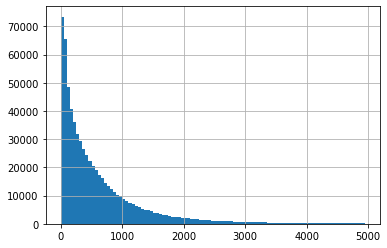

In [441]:
lens = BlogDf.clean_text.str.len()
lens.hist(bins = np.arange(0,5000,50))

In [442]:
# Using MultiLabelBinarizer transformer to transform labels
label_counts=dict()

for labels in BlogDf.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label]+=1
        else:
            label_counts[label]=1

In [443]:
label_counts

{'10.0': 233789,
 '20.0': 319817,
 '30.0': 92231,
 '40.0': 30761,
 'Accounting': 3703,
 'Advertising': 4663,
 'Agriculture': 1234,
 'Aquarius': 49422,
 'Architecture': 1611,
 'Aries': 64758,
 'Arts': 32305,
 'Automotive': 1242,
 'Banking': 4033,
 'Biotech': 2229,
 'BusinessServices': 4476,
 'Cancer': 64709,
 'Capricorn': 48973,
 'Chemicals': 3919,
 'Communications-Media': 20038,
 'Construction': 1075,
 'Consulting': 5823,
 'Education': 29572,
 'Engineering': 11561,
 'Environment': 588,
 'Fashion': 4824,
 'Gemini': 51309,
 'Government': 6866,
 'HumanResources': 3003,
 'Internet': 15884,
 'InvestmentBanking': 1286,
 'Law': 9022,
 'LawEnforcement-Security': 1875,
 'Leo': 53603,
 'Libra': 62146,
 'Manufacturing': 2231,
 'Maritime': 277,
 'Marketing': 4757,
 'Military': 3093,
 'Museums-Libraries': 3095,
 'Non-Profit': 14618,
 'Pisces': 53657,
 'Publishing': 7710,
 'RealEstate': 2867,
 'Religion': 5188,
 'Sagittarius': 49831,
 'Science': 7207,
 'Scorpio': 56597,
 'Sports-Recreation': 3029,
 

In [444]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [445]:
label_T=binarizer.fit_transform(BlogDf.labels) #transformed labels for use in model classifier

In [446]:
binarizer.classes_ 

array(['10.0', '20.0', '30.0', '40.0', 'Accounting', 'Advertising',
       'Agriculture', 'Aquarius', 'Architecture', 'Aries', 'Arts',
       'Automotive', 'Banking', 'Biotech', 'BusinessServices', 'Cancer',
       'Capricorn', 'Chemicals', 'Communications-Media', 'Construction',
       'Consulting', 'Education', 'Engineering', 'Environment', 'Fashion',
       'Gemini', 'Government', 'HumanResources', 'Internet',
       'InvestmentBanking', 'Law', 'LawEnforcement-Security', 'Leo',
       'Libra', 'Manufacturing', 'Maritime', 'Marketing', 'Military',
       'Museums-Libraries', 'Non-Profit', 'Pisces', 'Publishing',
       'RealEstate', 'Religion', 'Sagittarius', 'Science', 'Scorpio',
       'Sports-Recreation', 'Student', 'Taurus', 'Technology',
       'Telecommunications', 'Tourism', 'Transportation', 'Virgo',
       'female', 'indUnk', 'male'], dtype=object)

In [447]:
binarizer

MultiLabelBinarizer(classes=['10.0', '20.0', '30.0', '40.0', 'Accounting',
                             'Advertising', 'Agriculture', 'Aquarius',
                             'Architecture', 'Aries', 'Arts', 'Automotive',
                             'Banking', 'Biotech', 'BusinessServices', 'Cancer',
                             'Capricorn', 'Chemicals', 'Communications-Media',
                             'Construction', 'Consulting', 'Education',
                             'Engineering', 'Environment', 'Fashion', 'Gemini',
                             'Government', 'HumanResources', 'Internet',
                             'InvestmentBanking', ...],
                    sparse_output=False)

* Vectorization

In [448]:
X = BlogDf['clean_text']

In [449]:
X.shape

(676598,)

In [450]:
X_N = X[:4000] # We can use the subset of the complete data to build, train and test the model

In [451]:
# Using CountVectorizer with unigrams, bigrams and trigrams transformation of text features
# This will help get us contextual information using bigram
counter = CountVectorizer(stop_words = "english",ngram_range = (1,2),min_df = 1)
Features_N = counter.fit_transform(X_N)

In [452]:
Features_N.shape #(ngram_range=(1,2), min_df=0.001)

(4000, 243510)

In [453]:
label_N = label_T[:4000] # Subset of the target column

In [454]:
# Shape of the dataset for the model
print(Features_N.shape)
print(label_N.shape)

(4000, 243510)
(4000, 58)


* Train, Test split for model development

In [455]:
# Using CountVectorrizer with unigrams and bigrams transformation of text features
Xtrain,Xtest,Ytrain,Ytest = train_test_split(Features_N,label_N, test_size = 0.2, random_state=42)

In [456]:
print('Shape of Xtrain:', Xtrain.shape)
print('Shape of Xtest:', Xtest.shape)
print('Shape of Ytrain:', Ytrain.shape)
print('Shape of Ytest:', Ytest.shape)

Shape of Xtrain: (3200, 243510)
Shape of Xtest: (800, 243510)
Shape of Ytrain: (3200, 58)
Shape of Ytest: (800, 58)


#### Step3: Design, train, tune and test the best text classifier.

In [457]:
# generic function to print performance for different classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

# Dataframe to display classifier results
performance_df = pd.DataFrame(columns = ['Classifier', 'Accuracy_Score', 'F1_score', 'Avg_Precision_Score','Avg_Recall_Score'])

def display_score(clf):
  print(clf ,' classifier with OneVsRest classification startegy:')
  acc = np.round(accuracy_score(Ytest, Ypred)*100,2)
  f1 = np.round(f1_score(Ytest, Ypred, average='micro')*100,2)
  pre = np.round(average_precision_score(Ytest, Ypred, average='micro')*100,2)
  rec = np.round(recall_score(Ytest, Ypred, average='micro')*100,2)
  print('Accuracy score:', acc)
  print('F1 score: ' , f1)
  print('Average precision score: ', pre)
  print('Average recall score: ', rec)
  return acc,f1,pre,rec

  #print('Accuracy score: %0.2f' %(accuracy_score(Ytest, Ypred)*100))
  #print('F1 score: %0.2f' %(f1_score(Ytest, Ypred, average='micro')*100))
  #print('Average precision score: %0.2f' %(average_precision_score(Ytest, Ypred, average='micro')*100))
  #print('Average recall score: %0.2f' %(recall_score(Ytest, Ypred, average='micro')*100))



In [458]:
# Using Logistic Regression classifier
# Since we have multilabel case, we shall use addiotional strategy available from sklearn referred as OneVsRest Classifier 
# It helps to classify each label-class from the rest.
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( solver = 'lbfgs',max_iter = 1000)
lr_model=OneVsRestClassifier(lr)
lr_model.fit(Xtrain, Ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [459]:
Ypred=lr_model.predict(Xtest)
clf = 'Logistic Regression'
a,b,c,d = display_score(clf)
new_row = {'Classifier': str(clf), 'Accuracy_Score': a,'F1_score': b,'Avg_Precision_Score': c, 'Avg_Recall_Score': d}
performance_df = performance_df.append(new_row,ignore_index=True)

Logistic Regression  classifier with OneVsRest classification startegy:
Accuracy score: 59.25
F1 score:  77.89
Average precision score:  62.69
Average recall score:  73.66


In [460]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm_model=OneVsRestClassifier(svm)
svm_model.fit(Xtrain, Ytrain)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [461]:
Ypred=svm_model.predict(Xtest)
clf = 'Support Vector'
a,b,c,d = display_score(clf)
new_row = {'Classifier': str(clf), 'Accuracy_Score': a,'F1_score': b,'Avg_Precision_Score': c, 'Avg_Recall_Score': d}
performance_df = performance_df.append(new_row,ignore_index=True)

Support Vector  classifier with OneVsRest classification startegy:
Accuracy score: 57.63
F1 score:  76.75
Average precision score:  60.79
Average recall score:  73.97


In [462]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb_model=OneVsRestClassifier(nb)
nb_model.fit(Xtrain, Ytrain)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [463]:
Ypred=nb_model.predict(Xtest)
clf = 'Naive Bayes'
a,b,c,d = display_score(clf)
new_row = {'Classifier': str(clf), 'Accuracy_Score': a,'F1_score': b,'Avg_Precision_Score': c, 'Avg_Recall_Score': d}
performance_df = performance_df.append(new_row,ignore_index=True)

Naive Bayes  classifier with OneVsRest classification startegy:
Accuracy score: 41.75
F1 score:  72.48
Average precision score:  55.02
Average recall score:  67.69


In [464]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_model=OneVsRestClassifier(sgd)
sgd_model.fit(Xtrain, Ytrain)

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l2', power_t=0.5,
                                            random_state=None, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False),
                    n_jobs=None)

In [465]:
Ypred=sgd_model.predict(Xtest)
clf = 'SGD'
a,b,c,d = display_score(clf)
new_row = {'Classifier': str(clf), 'Accuracy_Score': a,'F1_score': b,'Avg_Precision_Score': c, 'Avg_Recall_Score': d}
performance_df = performance_df.append(new_row,ignore_index=True)

SGD  classifier with OneVsRest classification startegy:
Accuracy score: 57.0
F1 score:  79.05
Average precision score:  64.51
Average recall score:  74.34


In [468]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=0)
ada_model=OneVsRestClassifier(ada)
ada_model.fit(Xtrain, Ytrain)

OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=0),
                    n_jobs=None)

In [473]:
Ypred=ada_model.predict(Xtest)
clf = 'AdaBoost'
a,b,c,d = display_score(clf)
new_row = {'Classifier': str(clf), 'Accuracy_Score': a,'F1_score': b,'Avg_Precision_Score': c, 'Avg_Recall_Score': d}
performance_df = performance_df.append(new_row,ignore_index=True)

AdaBoost  classifier with OneVsRest classification startegy:
Accuracy score: 52.12
F1 score:  77.42
Average precision score:  61.85
Average recall score:  74.09


In [474]:
performance_df

,Classifier,Accuracy_Score,F1_score,Avg_Precision_Score,Avg_Recall_Score
0,Logistic Regression,59.25,77.89,62.69,73.66
1,Support Vector,57.63,76.75,60.79,73.97
2,Naive Bayes,41.75,72.48,55.02,67.69
3,SGD,57.00,79.05,64.51,74.34
4,AdaBoost,52.12,77.42,61.85,74.09


We have SGD classifier better results than other classifiers with 79% f1 score and best precision and recall score as well

#### Step4: Display and explain detail the classification report

In [475]:
Ypred=sgd_model.predict(Xtest)

In [476]:
from sklearn.metrics import classification_report
report = classification_report(Ytest, Ypred, target_names=binarizer.classes_, output_dict=True)
pd.set_option('display.max_rows', 100) 
df = pd.DataFrame(report).transpose()
df[df['support'] != 0]


,precision,recall,f1-score,support
10.0,0.838384,0.584507,0.688797,142.0
20.0,0.714286,0.492958,0.583333,142.0
30.0,0.853480,0.915521,0.883412,509.0
40.0,0.000000,0.000000,0.000000,7.0
Aquarius,0.695652,0.463768,0.556522,69.0
Aries,0.833992,0.899787,0.865641,469.0
Arts,1.000000,0.333333,0.500000,3.0
Banking,0.000000,0.000000,0.000000,4.0
BusinessServices,1.000000,0.555556,0.714286,9.0
Cancer,0.750000,0.272727,0.400000,22.0


Precision  gives the percentage of correctness of the classified positive instances and recall gives the percentage of correctness of the actual positive instances. To focus on precision or recall it depends upon the business case. For example for heatlth related cases recall is more important performance metric than precision. However in our case precision would be enough.

For age classification '10 to 20' and '30 to 40' we have more than 80% precision. however the model poorly performed '>40' and '20 to 30'. This could be due to imbalance in dataset when we chose 4000 records from the actual data set. A good subset of the data which includes balanced class labels would have given much better results for model to learn.

For gender classification the model was able to perform better in classifing precisely as male or female author.

For sign and industry, the mddel performed with better precision in most cases except for few which could be class imbalance as mentioned above while choosing the data subset.

We can also use f1 score which uses weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. As a rule of thumb, the weighted average of F1 should be used to compare classifier models instead of global accuracy. The f1 score is 80% using SDG classifier.

We have micro average and macro avergae metric as well. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In  our multi-class classification, micro-average is preferable since we see there is a class imbalance. 

#### Step5: Print the true vs predicted labels for any 5 entries from the dataset.

In [477]:
Ypred_inverse = binarizer.inverse_transform(Ypred)
Ytest_inverse = binarizer.inverse_transform(Ytest)
arr = np.random.randint(800, size=(1, 5))
for i in range(0,5):
  j = arr[0,i]
  print('*************** For ', j, 'th entry ***************')
  print('Predicted:',Ypred_inverse[j])
  print('Actual   :',Ytest_inverse [j])



*************** For  430 th entry ***************
Predicted: ('20.0', 'female', 'male')
Actual   : ('20.0', 'Aries', 'Internet', 'male')
*************** For  618 th entry ***************
Predicted: ('30.0', 'Aries', 'Technology', 'male')
Actual   : ('30.0', 'Aries', 'Technology', 'male')
*************** For  531 th entry ***************
Predicted: ('Student', 'female')
Actual   : ('20.0', 'Sagittarius', 'female', 'indUnk')
*************** For  671 th entry ***************
Predicted: ('30.0', 'Aries', 'Technology', 'male')
Actual   : ('30.0', 'Aries', 'Technology', 'male')
*************** For  455 th entry ***************
Predicted: ('30.0', 'Aries', 'Technology', 'male')
Actual   : ('30.0', 'Aries', 'Technology', 'male')


Of randomly selected five test instances, we see the model gives predicted and actual label same for three cases index - 618, 671 and 455. 

### Project2 - Python based interactive semi - rule based chatbot. 

#### Project Task: 
1. Start chat session with greetings and ask what the user is looking for.
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.

* Import json and read json corpus file:

In [249]:
import json

#import corpus
with open('/gdrive/MyDrive/Colab Notebooks/Projects/NLP/GLBot.json') as file:
  Corpus =json.load(file)

#Display Corpus file
Corpus

{'intents': [{'context_set': '',
   'patterns': ['hi',
    'how are you',
    'is anyone there',
    'hello',
    'whats up',
    'hey',
    'yo',
    'listen',
    'please help me',
    'i am learner from',
    'i belong to',
    'aiml batch',
    'aifl batch',
    'i am from',
    'my pm is',
    'blended',
    'online',
    'i am from',
    'hey ya',
    'talking to you for first time'],
   'responses': ['Hello! how can i help you ?'],
   'tag': 'Intro'},
  {'context_set': '',
   'patterns': ['thank you',
    'thanks',
    'cya',
    'see you',
    'later',
    'see you later',
    'goodbye',
    'i am leaving',
    'have a Good day',
    'you helped me',
    'thanks a lot',
    'thanks a ton',
    'you are the best',
    'great help',
    'too good',
    'you are a good learning buddy'],
   'responses': ['I hope I was able to assist you, Good Bye'],
   'tag': 'Exit'},
  {'context_set': '',
   'patterns': ['olympus',
    'explain me how olympus works',
    'I am not able to understa

* Data Preprocessing:

From the bag words the root word will be learnt in order to identify the correct tag and respond accoringly.

In [313]:
from nltk.stem import WordNetLemmatizer
nltk.download('punkt', quiet=True)

True

In [315]:
W = [] # Tokens
L = [] #identified tags
doc_x = [] #Tokenised words
doc_y = [] #Tags or labels
for intent in Corpus['intents']:
  for pattern in intent['patterns']:
    w_temp = nltk.word_tokenize(pattern)
    W.extend(w_temp)
    doc_x.append(w_temp)
    doc_y.append(intent['tag'])
  if intent['tag'] not in L: 
    #add the missing tag if any
    L.append(intent['tag'])

In [317]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
#Stemming
W = [stemmer.stem(w.lower()) for w in W if w != "?"] #learning the root word
W = sorted(list(set(W))) # sorted words
L = sorted(L) # sorted list of tags


* Bag of Words

In [319]:
Train = []
Target = []

out_empty = [0 for _ in range(len(L))]

#loop to create bow and put freq count on each word
for x, doc in enumerate(doc_x):
  bag = []

  w_temp = [stemmer.stem(w.lower()) for w in doc]

  for w in W:
    if w in w_temp:
      bag.append(1)
    else:
      bag.append(0)
  
  output_row = out_empty[:]
  output_row[L.index(doc_y[x])] = 1

  Train.append(bag) #list
  Target.append(output_row) #list

In [320]:
#converting to np arrays for mdel to understand
Train = np.array(Train)
Target = np.array(Target)

* Build model

In [322]:
pip install tflearn 

     |████████████████████████████████| 112kB 8.0MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=472b3c86594a23422dbf24a9108d23400b521e2b64b6f1ad96466a923dd7f318
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [326]:
import tflearn

NN = tflearn.input_data(shape=[None, len(Train[0])]) #input layer
NN = tflearn.fully_connected(NN,8) #dense layer with 8 neuron
NN = tflearn.fully_connected(NN,8) #dense layer with 8 neuron
NN = tflearn.fully_connected(NN,len(Target[0]),activation="softmax") #output layer
NN = tflearn.regression(NN)

model = tflearn.DNN(NN)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


* Train model

In [328]:
model.fit(Train, Target, n_epoch = 200, batch_size =8, show_metric = True)
model.save("model.tflearn") # save the model

Training Step: 3769  | total loss: 0.01900 | time: 0.064s
| Adam | epoch: 236 | loss: 0.01900 - acc: 1.0000 -- iter: 120/128
Training Step: 3770  | total loss: 0.02066 | time: 0.068s
| Adam | epoch: 236 | loss: 0.02066 - acc: 1.0000 -- iter: 128/128
--
INFO:tensorflow:/gdrive/My Drive/Colab Notebooks/Projects/NLP/model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


* Design Interactive utility

In [489]:
import random
def bag_of_words(s, W):
  bag = [0 for _ in range(len(W))]

  s_words = nltk.word_tokenize(s)
  s_words = [stemmer.stem(word.lower()) for word in s_words]

  for se in s_words:
    for i,w in enumerate(W):
      if w == se:
        bag[i] = 1

  return np.array(bag)

def chat():
  print("GLBOT: My name is GLbot. I will answer your queries about Great learning If you want to exit, type Bye!")
  print("GLBOT: If answer is not right (type:*)")
  while(flag==True):
    inp = input("\n\nYou: ")
    inp = inp.lower()
    if inp == "*":
      print("GLBOT: Please rephrase your query amd try again")
    if inp == "bye":
      print("GLBOT: Bye! take care..")
      break
    
    results = model.predict([bag_of_words(inp,W)])
    results_index = np.argmax(results)
    tag = L[results_index]
    
    for tg in Corpus['intents']:
      if tg['tag'] == tag:
        #print(tg['responses'])
        responses = tg['responses']
    
    if tag in ['SL','NN', 'Olympus']:
      print('GLBOT: Please use the ', random.choice(responses))
    else:
      print('GLBOT: ', random.choice(responses))
  
    
  

In [490]:
chat()

GLBOT: My name is GLbot. I will answer your queries about Great learning If you want to exit, type Bye!
GLBOT: If answer is not right (type:*)


You: Hi
GLBOT:  Hello! how can i help you ?


You: who r you
GLBOT:  I am your virtual learning assistant


You: whats ur name
GLBOT:  I am your virtual learning assistant


You: i dont have access to olympus
GLBOT:  Tarnsferring the request to your PM


You: i do not understand deep learning
GLBOT: Please use the  Link: Neural Nets wiki


You: need help on supervised learning
GLBOT: Please use the  Link: Machine Learning wiki 


You: you are not worth
GLBOT:  Hello! how can i help you ?


You: hell
GLBOT:  Hello! how can i help you ?


You: what the hell
GLBOT:  Please use respectful words


You: thank you
GLBOT:  I hope I was able to assist you, Good Bye


You: bye
GLBOT: Bye! take care..


### ****************** THANK YOU *******************